# **Cinemática de un robot planar**

**Docente:** PhD Jorge Rudas

**Diseño de prototipos - 2025 I**

**INFOTEP**

## Importar librerias

In [ ]:
import numpy as np
from sympy import*
init_printing()

## Se crean variables simbólicas

In [ ]:
## Variables Simbolicas
theta_1 = symbols("theta_1",  real=True)
theta_2 = symbols("theta_2",  real=True)
l_1 = symbols("l_1",  real=True)
l_2 = symbols("l_2",  real=True)

## Transformación desde el estado 0 al estado 1

In [ ]:
_0H1 = Matrix([[cos(theta_1), -sin(theta_1), 0, 0], [sin(theta_1), cos(theta_1), 0, 0], [0, 0, 1, 0], [0, 0, 0, 1]])

In [ ]:
_0H1


⎡cos(θ₁)  -sin(θ₁)  0  0⎤
⎢                       ⎥
⎢sin(θ₁)  cos(θ₁)   0  0⎥
⎢                       ⎥
⎢   0        0      1  0⎥
⎢                       ⎥
⎣   0        0      0  1⎦

## Transformación desde el estado 1 al estado 2

In [ ]:
_1H2 = Matrix([[1, 0, 0, l_1], [0, 1, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1]])

In [ ]:
_1H2

⎡1  0  0  l₁⎤
⎢           ⎥
⎢0  1  0  0 ⎥
⎢           ⎥
⎢0  0  1  0 ⎥
⎢           ⎥
⎣0  0  0  1 ⎦

## Transformación desde el estado 2 al estado 3

In [ ]:
_2H3 = Matrix([[cos(theta_2), -sin(theta_2), 0, 0], [sin(theta_2), cos(theta_2), 0, 0], [0, 0, 1, 0], [0, 0, 0, 1]])

In [ ]:
_2H3

⎡cos(θ₂)  -sin(θ₂)  0  0⎤
⎢                       ⎥
⎢sin(θ₂)  cos(θ₂)   0  0⎥
⎢                       ⎥
⎢   0        0      1  0⎥
⎢                       ⎥
⎣   0        0      0  1⎦

## Transformación desde el estado 3 al estado 4

In [ ]:
_3H4 = Matrix([[1, 0, 0, l_2], [0, 1, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1]])

In [ ]:
_3H4


⎡1  0  0  l₂⎤
⎢           ⎥
⎢0  1  0  0 ⎥
⎢           ⎥
⎢0  0  1  0 ⎥
⎢           ⎥
⎣0  0  0  1 ⎦

## Composición de cada estado de la cinemática

In [ ]:
H = simplify(_0H1@_1H2@_2H3@_3H4)

In [ ]:
H

⎡cos(θ₁ + θ₂)  -sin(θ₁ + θ₂)  0  l₁⋅cos(θ₁) + l₂⋅cos(θ₁ + θ₂)⎤
⎢                                                            ⎥
⎢sin(θ₁ + θ₂)  cos(θ₁ + θ₂)   0  l₁⋅sin(θ₁) + l₂⋅sin(θ₁ + θ₂)⎥
⎢                                                            ⎥
⎢     0              0        1               0              ⎥
⎢                                                            ⎥
⎣     0              0        0               1              ⎦

## Posición del efector final

In [ ]:
P = H[0:2, 3]

In [ ]:
P

⎡l₁⋅cos(θ₁) + l₂⋅cos(θ₁ + θ₂)⎤
⎢                            ⎥
⎣l₁⋅sin(θ₁) + l₂⋅sin(θ₁ + θ₂)⎦

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def dibujar_brazo_mecanico(theta1, theta2, l1, l2):
  """Función para dibujar un brazo mecanico con 2 grados de libertad.

  Parametros:
    theta1: Angulo de la primera articulacion en radianes.
    theta2: Angulo de la segunda articulacion en radianes.
    l1: Longitud del primer extremo
    l2: Longitud del segundo extremo
  """

  # Calculamos la posición del efector final
  x1 = l1 * np.cos(theta1)
  y1 = l1 * np.sin(theta1)
  x2 = x1 + l2 * np.cos(theta1 + theta2)
  y2 = y1 + l2 * np.sin(theta1 + theta2)

  # Dibujando el brazo con lineas y puntos
  plt.figure(figsize=(6, 6))
  plt.plot([0, x1], [0, y1], 'b-', linewidth=5)  # First link
  plt.plot([x1, x2], [y1, y2], 'b-', linewidth=5)  # Second link
  plt.plot(0, 0, 'ro', markersize=10)  # Base
  plt.plot(x2, y2, 'go', markersize=10)  # End-effector

  # Se dibujan los límites y los labels
  plt.xlim([-l1 - l2, l1 + l2])
  plt.ylim([-l1 - l2, l1 + l2])
  plt.xlabel('X')
  plt.ylabel('Y')
  plt.title('Brazo robótico')
  plt.grid(True)
  plt.show()

## Ejemplo de manipulación del brazo robotico en su estado final

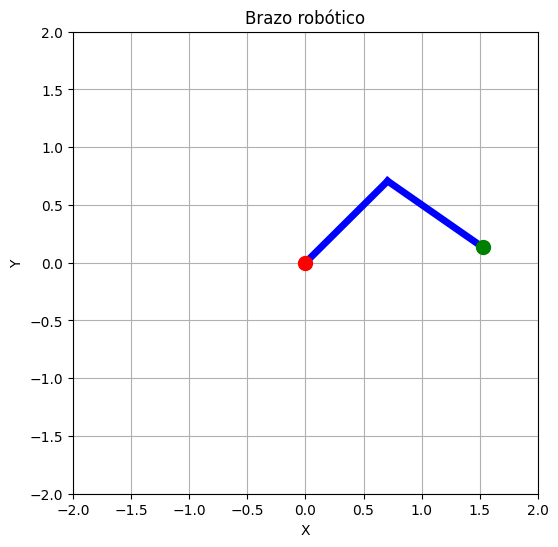

In [ ]:
theta1 = np.deg2rad(45)  # 45 grados
theta2 = np.deg2rad(-80)  # -30 grados
l1 = 1
l2 = 1
dibujar_brazo_mecanico(theta1, theta2, l1, l2)

## **Taller**

*  Dibujar cada estado del anterior brazo robótico
*  Imagine un brazo robótico cuyas extremidades miden 2 unidades cada una. Podría este brazo alcanzar cualquier objeto dentro de la cuadricula de 2 x 2? Explique detalladamente su razonamiento

## Parametros del brazo

In [ ]:
# Parámetros del brazo para que mida 2 unidades
l1 = 2
l2 = 2



## Parámetros de los ángulos

In [ ]:
# Angulos modificables
theta1 = np.deg2rad(90)
theta2 = np.deg2rad(-120)



## Función

* Se calculan posiciones
* Se dibuja el brazo y las cuadrículas 2x2
* Se crean los limites del gráfico

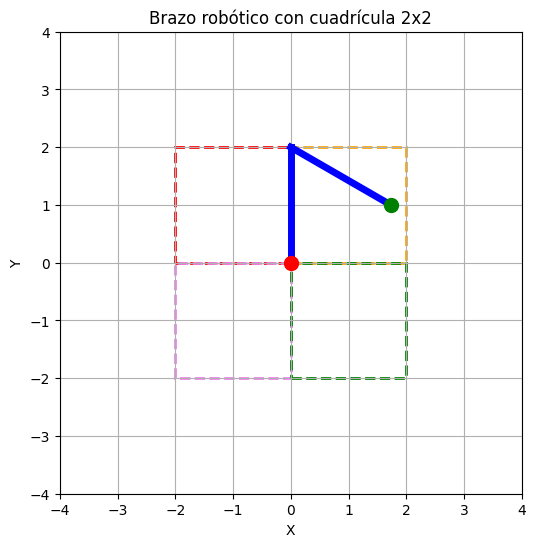

In [ ]:
# Se define la función

def brazom_cuadricula(theta1, theta2, l1, l2):

    # Se calculan las posiciones
    x1 = l1 * np.cos(theta1)
    y1 = l1 * np.sin(theta1)
    x2 = x1 + l2 * np.cos(theta1 + theta2)
    y2 = y1 + l2 * np.sin(theta1 + theta2)

    # Dibujo del brazo
    plt.figure(figsize=(6, 6))
    plt.plot([0, x1], [0, y1], 'b-', linewidth=5)
    plt.plot([x1, x2], [y1, y2], 'b-', linewidth=5)
    plt.plot(0, 0, 'ro', markersize=10)
    plt.plot(x2, y2, 'go', markersize=10)

    # cuadrículas 2x2
    rect = plt.Rectangle((0, 0), 2, 2, linewidth=2, edgecolor='orange', facecolor='none', linestyle='--') # Cuadrícula #1

    rect2 = plt.Rectangle((-2, 0), 2, 2, linewidth=2, edgecolor='red', facecolor='none', linestyle='--') # Cuadrícula #2

    rect3 = plt.Rectangle((0, 0), -2, -2, linewidth=2, edgecolor='violet', facecolor='none', linestyle='--') # Cuadrícula #3

    rect4 = plt.Rectangle((0, -2), 2, 2, linewidth=2, edgecolor='green', facecolor='none', linestyle='--') # Cuadrícula #4

    # vista de las cuadriculas 2x2

    plt.gca().add_patch(rect) #1
    plt.gca().add_patch(rect2) #2
    plt.gca().add_patch(rect3) #3
    plt.gca().add_patch(rect4) #4


   # Se establecen los límites del gráfico
    alcance_total = l1 + l2
    plt.xlim([-alcance_total, alcance_total])
    plt.ylim([-alcance_total, alcance_total])
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Brazo robótico con cuadrícula 2x2')
    plt.grid(True)
    plt.gca().set_aspect('equal')
    plt.show()

# Llamado de función
brazom_cuadricula(theta1, theta2, l1, l2)

## Razonamiento

* Luego de estar probando y jugando con la combinación de los ángulos de las dos extensiones de los brazos, se llegó a la siguiente concusión:

  * Suponiendo que el brazo robótico tiene su base fija en el punto (0, 0) y que este punto no se puede mover, podemos decir que el primer segmento del brazo (l1) puede girar en cualquier dirección: hacia la izquierda, derecha, arriba, abajo e incluso en diagonal. Por eso, podemos imaginar 4 cuadrículas de 2x2 alrededor del origen que representa todo el espacio que puede cubrir ese primer movimiento.

    Teniendo eso en cuenta, el segundo segmento del brazo (l2), que se extiende desde el final de l1, puede alcanzar cualquier objeto que esté dentro de alguna de esas cuadrículas
  
  * El brazo podría alcanzar algún objeto que se encuentre dentro de la cuadricula 2x2 central, donde está ubicado el punto (0, 0) del brazo

  * El alcance máximo del brazo es de 4 unidades en cualquier dirección (Estando totalmente recto)

## Ejemplos visuales

### Cuadricula 1

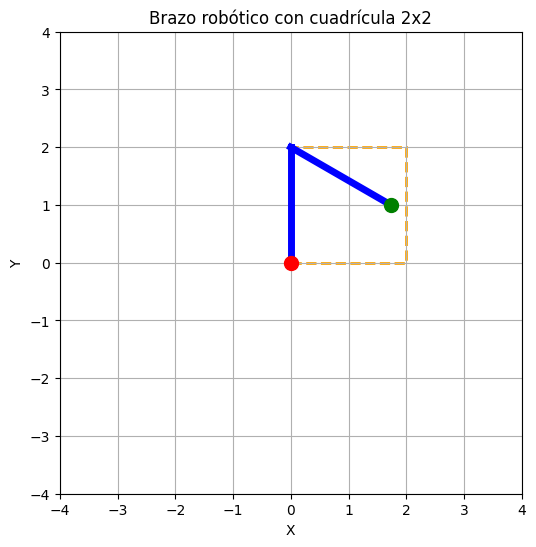

In [ ]:
# Se define la función

def cuadricula_1(theta1, theta2, l1, l2):

    # Angulos modificables
    theta1 = np.deg2rad(90)
    theta2 = np.deg2rad(-120)

    # Se calculan las posiciones
    x1 = l1 * np.cos(theta1)
    y1 = l1 * np.sin(theta1)
    x2 = x1 + l2 * np.cos(theta1 + theta2)
    y2 = y1 + l2 * np.sin(theta1 + theta2)

    # Dibujo del brazo
    plt.figure(figsize=(6, 6))
    plt.plot([0, x1], [0, y1], 'b-', linewidth=5)
    plt.plot([x1, x2], [y1, y2], 'b-', linewidth=5)
    plt.plot(0, 0, 'ro', markersize=10)
    plt.plot(x2, y2, 'go', markersize=10)

    # cuadrículas 2x2
    rect = plt.Rectangle((0, 0), 2, 2, linewidth=2, edgecolor='orange', facecolor='none', linestyle='--') # Cuadrícula #1

    # vista de las cuadriculas 2x2
    plt.gca().add_patch(rect) #1

   # Se establecen los límites del gráfico
    alcance_total = l1 + l2
    plt.xlim([-alcance_total, alcance_total])
    plt.ylim([-alcance_total, alcance_total])
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Brazo robótico con cuadrícula 2x2')
    plt.grid(True)
    plt.gca().set_aspect('equal')
    plt.show()

# Llamado de función
cuadricula_1(theta1, theta2, l1, l2)

### Cuadricula 2

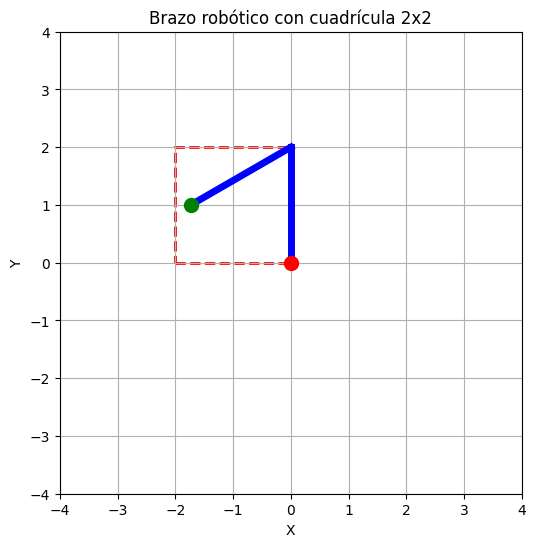

In [ ]:
# Se define la función

def cuadricula_2(theta1, theta2, l1, l2):

    # Angulos modificables
    theta1 = np.deg2rad(90)
    theta2 = np.deg2rad(120)

    # Se calculan las posiciones
    x1 = l1 * np.cos(theta1)
    y1 = l1 * np.sin(theta1)
    x2 = x1 + l2 * np.cos(theta1 + theta2)
    y2 = y1 + l2 * np.sin(theta1 + theta2)

    # Dibujo del brazo
    plt.figure(figsize=(6, 6))
    plt.plot([0, x1], [0, y1], 'b-', linewidth=5)
    plt.plot([x1, x2], [y1, y2], 'b-', linewidth=5)
    plt.plot(0, 0, 'ro', markersize=10)
    plt.plot(x2, y2, 'go', markersize=10)

    # cuadrículas 2x2
    rect2 = plt.Rectangle((-2, 0), 2, 2, linewidth=2, edgecolor='red', facecolor='none', linestyle='--') # Cuadrícula #2

    # vista de las cuadriculas 2x2
    plt.gca().add_patch(rect2) #2


   # Se establecen los límites del gráfico
    alcance_total = l1 + l2
    plt.xlim([-alcance_total, alcance_total])
    plt.ylim([-alcance_total, alcance_total])
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Brazo robótico con cuadrícula 2x2')
    plt.grid(True)
    plt.gca().set_aspect('equal')
    plt.show()

# Llamado de función
cuadricula_2(theta1, theta2, l1, l2)

### Cuadrícula 3

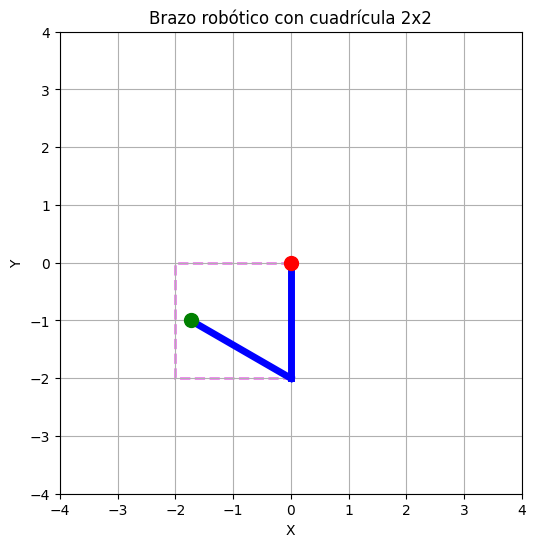

In [ ]:
# Se define la función

def cuadricula_3(theta1, theta2, l1, l2):

     # Angulos modificables
    theta1 = np.deg2rad(-90)
    theta2 = np.deg2rad(-120)

    # Se calculan las posiciones
    x1 = l1 * np.cos(theta1)
    y1 = l1 * np.sin(theta1)
    x2 = x1 + l2 * np.cos(theta1 + theta2)
    y2 = y1 + l2 * np.sin(theta1 + theta2)

    # Dibujo del brazo
    plt.figure(figsize=(6, 6))
    plt.plot([0, x1], [0, y1], 'b-', linewidth=5)
    plt.plot([x1, x2], [y1, y2], 'b-', linewidth=5)
    plt.plot(0, 0, 'ro', markersize=10)
    plt.plot(x2, y2, 'go', markersize=10)

    # cuadrículas 2x2
    rect3 = plt.Rectangle((0, 0), -2, -2, linewidth=2, edgecolor='violet', facecolor='none', linestyle='--') # Cuadrícula #3

    # vista de las cuadriculas 2x2
    plt.gca().add_patch(rect3) #3


   # Se establecen los límites del gráfico
    alcance_total = l1 + l2
    plt.xlim([-alcance_total, alcance_total])
    plt.ylim([-alcance_total, alcance_total])
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Brazo robótico con cuadrícula 2x2')
    plt.grid(True)
    plt.gca().set_aspect('equal')
    plt.show()

# Llamado de función
cuadricula_3(theta1, theta2, l1, l2)

### Cuadrícula 4

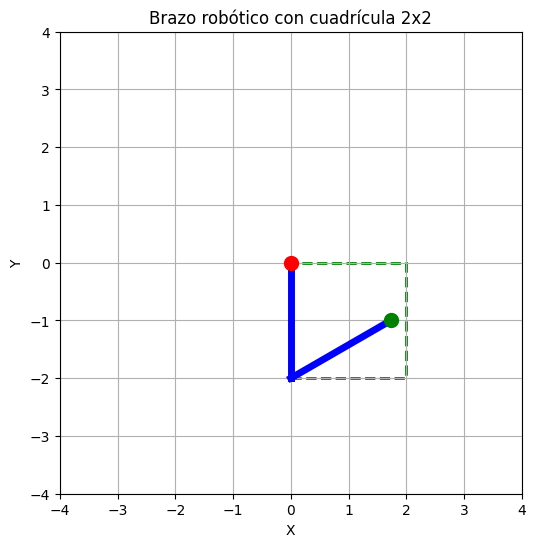

In [ ]:
# Se define la función

def cuadricula_3(theta1, theta2, l1, l2):

     # Angulos modificables
    theta1 = np.deg2rad(-90)
    theta2 = np.deg2rad(120)

    # Se calculan las posiciones
    x1 = l1 * np.cos(theta1)
    y1 = l1 * np.sin(theta1)
    x2 = x1 + l2 * np.cos(theta1 + theta2)
    y2 = y1 + l2 * np.sin(theta1 + theta2)

    # Dibujo del brazo
    plt.figure(figsize=(6, 6))
    plt.plot([0, x1], [0, y1], 'b-', linewidth=5)
    plt.plot([x1, x2], [y1, y2], 'b-', linewidth=5)
    plt.plot(0, 0, 'ro', markersize=10)
    plt.plot(x2, y2, 'go', markersize=10)

    # cuadrículas 2x2
    rect4 = plt.Rectangle((0, -2), 2, 2, linewidth=2, edgecolor='green', facecolor='none', linestyle='--') # Cuadrícula #4

    # vista de las cuadriculas 2x2
    plt.gca().add_patch(rect4) #4


   # Se establecen los límites del gráfico
    alcance_total = l1 + l2
    plt.xlim([-alcance_total, alcance_total])
    plt.ylim([-alcance_total, alcance_total])
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Brazo robótico con cuadrícula 2x2')
    plt.grid(True)
    plt.gca().set_aspect('equal')
    plt.show()

# Llamado de función
cuadricula_3(theta1, theta2, l1, l2)

### Como se puede apreciar, en cada cuadrícula el brazo puede alcanzar cualquier objeto dentro de alguna de estas.

### Este ejemplo se realizó con la combinación de los ángulos:

### * 90 para L1
### * 120 para L2

### (En positivos y negativos)